In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import seaborn as sb

In [5]:
imdb=pd.read_csv('IMDB.csv')

In [6]:
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [9]:
imdb.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [10]:
for index,row in imdb['Revenue (Millions)'].iteritems():
    if(row<=0):
        imdb['Revenue (Millions)'].loc[index]=np.NaN
    else:
        imdb['Revenue (Millions)'].loc[index]=row
revenue=imdb['Revenue (Millions)']
m=np.mean(revenue)
imdb['Revenue (Millions)']=imdb['Revenue (Millions)'].fillna(m)

C:\Users\SARTHAK\Anaconda3.3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#metascore missing value=rating *9.5
for index,row in imdb['Metascore'].iteritems():
    if(math.isnan(row)):
        imdb['Metascore'].loc[index]=(imdb['Rating'].loc[index])*(9.5)
    else:
        imdb['Metascore'].loc[index]=row
        


In [12]:
pd.DataFrame(imdb)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.00
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.00
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.00
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.00
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.00
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130000,42.00
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.00
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,83.051619,71.00
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010000,78.00
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010000,41.00


In [13]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,83.051619,59.244650
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.376270,16.865557
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.010000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.522500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.480000,60.000000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Most Movies are released in : 2016 = 297


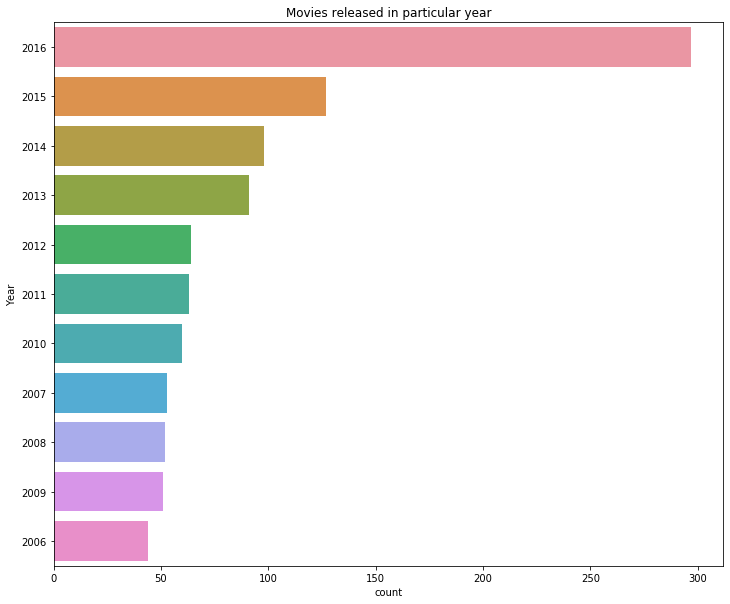

In [14]:
year=Counter(imdb['Year'])
print('Most Movies are released in :',year.most_common(1)[0][0],'=',year.most_common(1)[0][1])
cnt=imdb['Year'].value_counts()
plt.figure(figsize=(12,10))
plt.title('Movies released in particular year')
Year=sb.countplot(y=imdb['Year'],data=imdb['Year'],order=cnt.index)
plt.show()

In [16]:
import itertools
unique_genres = imdb['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)
individualgenres = []
for i in individual_genres:
    individualgenres.append(i)

In [17]:
print('Number of movies in each genre:')
count=[]
others=[]
res1=[]
for genre in individualgenres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    a=len(imdb[current_genre])
    print(genre,':' ,len(imdb[current_genre]))
    if(a>50):
        count.append(a)
        res1.append(genre)
    else:
        others.append(a)
   
 
    

    

Number of movies in each genre:
Horror : 119
Family : 51
Musical : 5
War : 13
Music : 21
Action : 303
Adventure : 259
Sport : 18
Animation : 49
Romance : 141
Fantasy : 101
History : 29
Mystery : 106
Thriller : 195
Biography : 81
Comedy : 279
Crime : 150
Drama : 513
Western : 7
Sci-Fi : 120


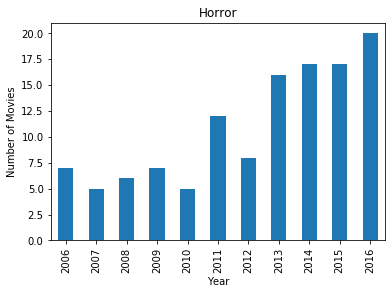

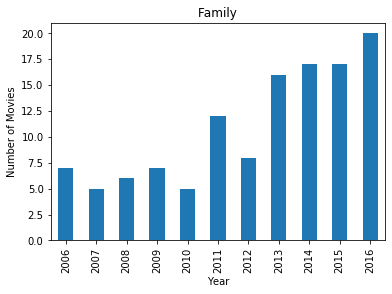

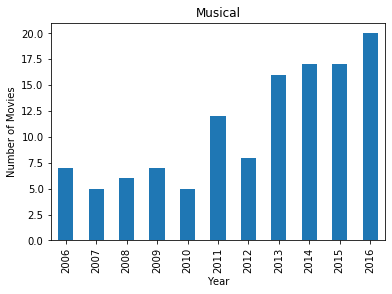

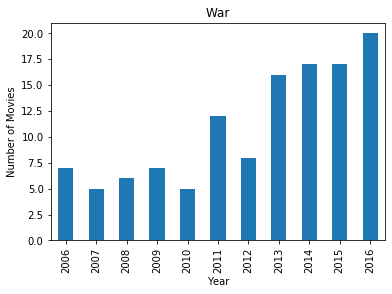

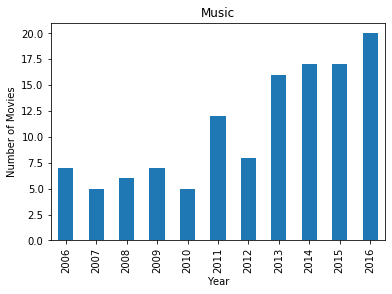

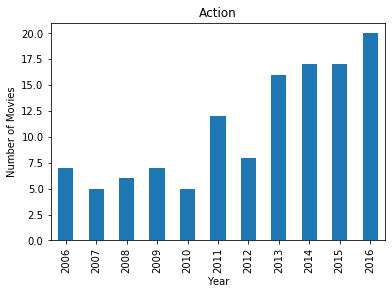

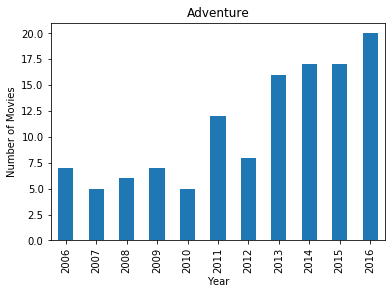

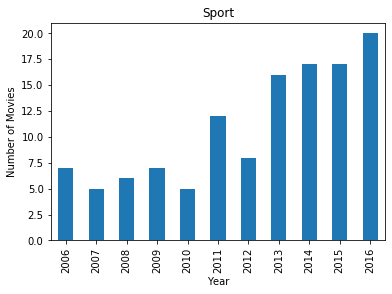

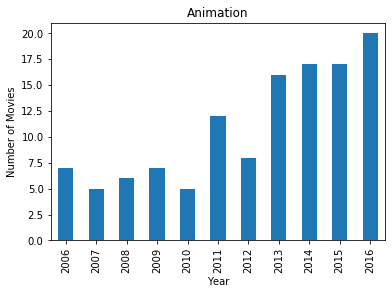

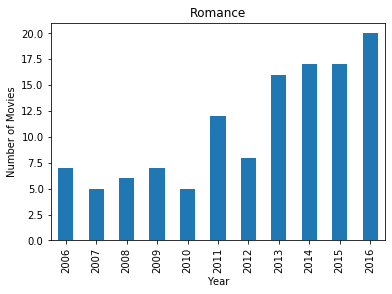

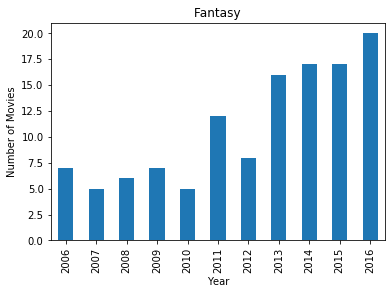

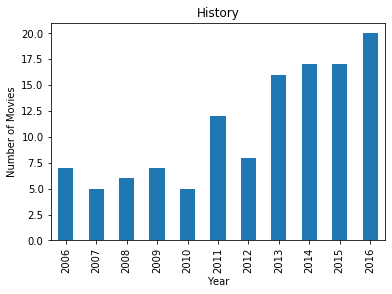

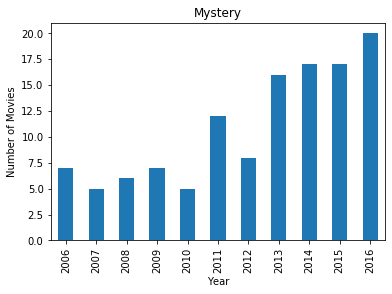

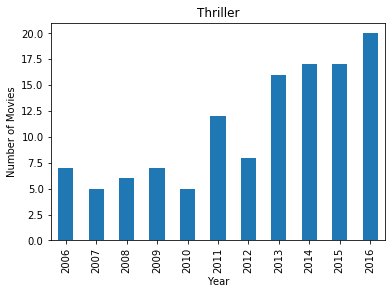

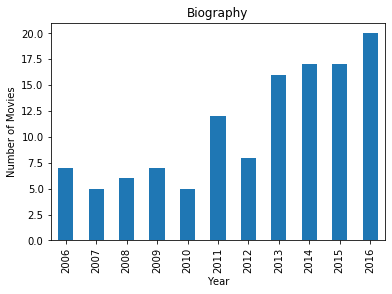

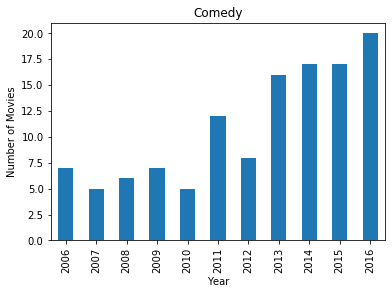

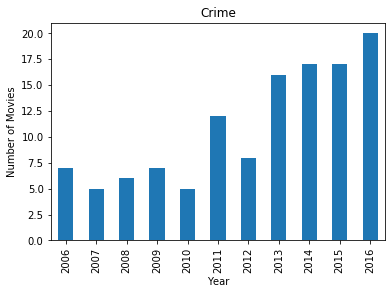

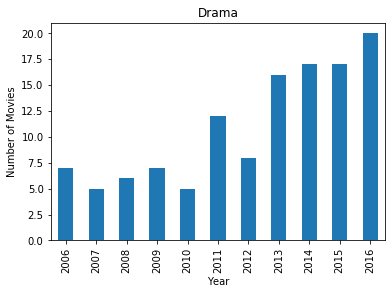

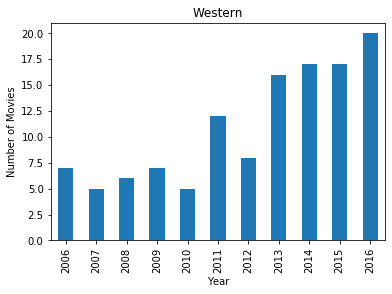

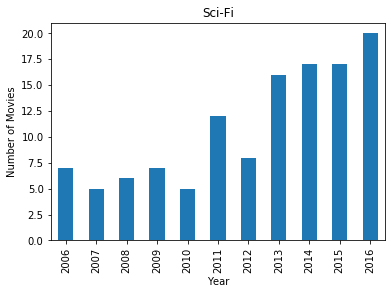

In [18]:
for genre in individual_genres:
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(str(genre))
    imdb[current_genre].Year.value_counts().sort_index().plot(kind='bar')

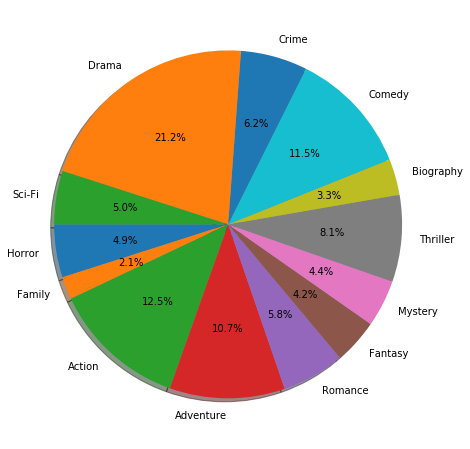

In [19]:
#Pie Chart of Genres
plt.figure(figsize=(8,8))
plt.pie(count, labels=res1, autopct='%1.1f%%', shadow=True ,startangle=180)
plt.show()

Popular Directors: 2016 = 297


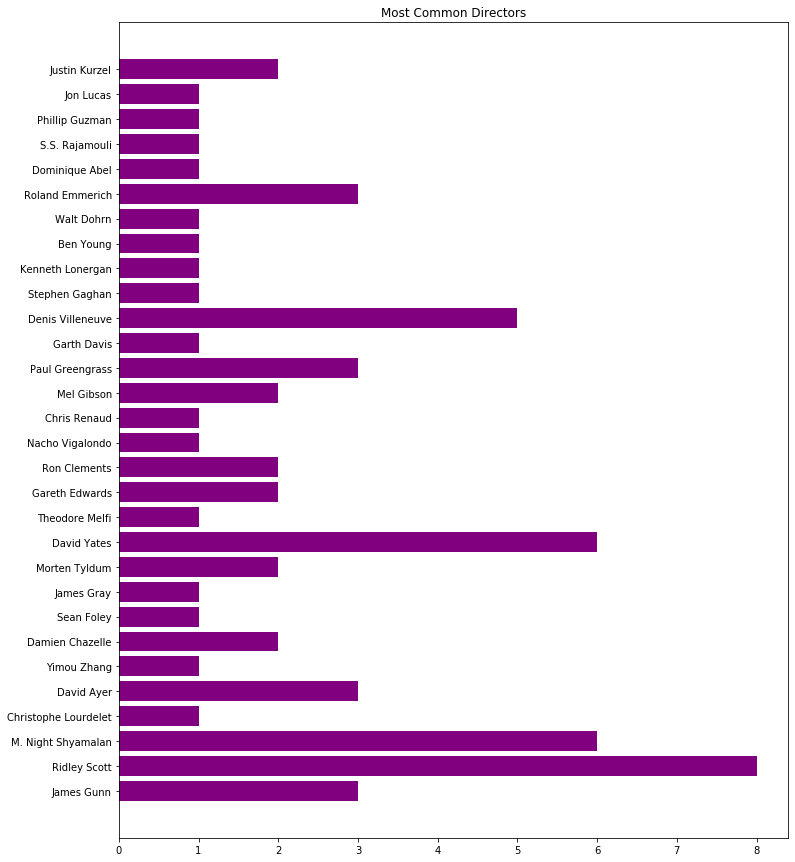

In [20]:
director=Counter(imdb['Director'])
print('Popular Directors:',year.most_common(1)[0][0],'=',year.most_common(1)[0][1])
plt.figure(figsize=(12,15))
lists = director.items()
x, y = zip(*lists) 
plt.title('Most Common Directors')
plt.barh(x[:30], y[:30],color='purple')
plt.show()

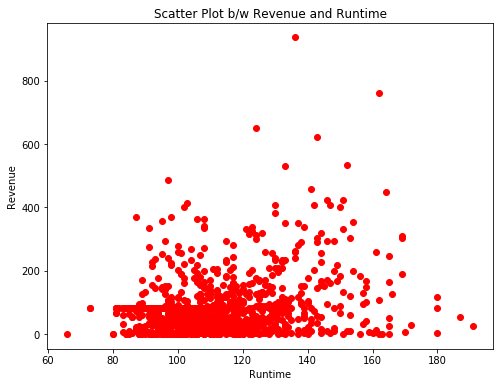

Pearson coefficient is 0.2470188056724427
P-value 2.2856043154854077e-15


In [21]:
plt.figure(figsize=(8,6))
plt.scatter(imdb['Runtime (Minutes)'],imdb['Revenue (Millions)'],color='red')
plt.title("Scatter Plot b/w Revenue and Runtime")
plt.ylabel('Revenue')
plt.xlabel('Runtime')
plt.show()
r,p=stats.pearsonr(imdb['Revenue (Millions)'],imdb['Runtime (Minutes)'])
print('Pearson coefficient is',r)
print('P-value',float(p))

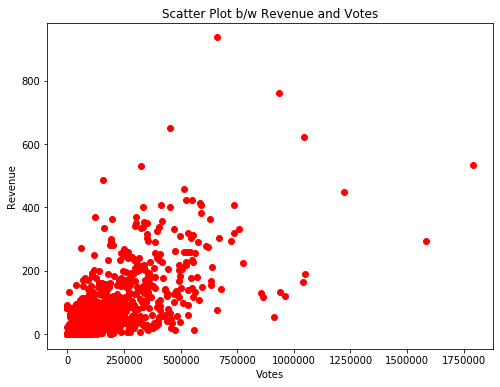

Pearson coefficient is 0.6073087538591406
P-value 7.820434978740454e-102


In [22]:
plt.figure(figsize=(8,6))
plt.scatter(imdb['Votes'],imdb['Revenue (Millions)'],color='red')
plt.title("Scatter Plot b/w Revenue and Votes")
plt.ylabel('Revenue')
plt.xlabel('Votes')
plt.show()
r,p=stats.pearsonr(imdb['Revenue (Millions)'],imdb['Votes'])
print('Pearson coefficient is',r)
print('P-value',p)

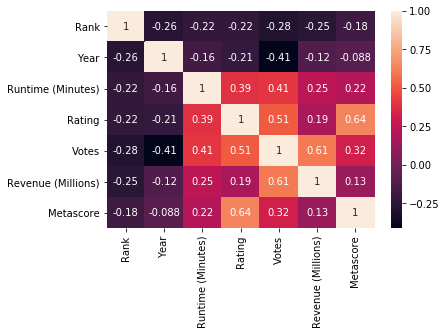

In [25]:
#LETS START REGRESSION ANALYSIS FOR REVENUE PREDICTION NOW
sb.heatmap(imdb.corr(),annot=True)
        

In [26]:
#SIMPLE LINEAR REGRESSION BETWEEN REVENUE AND VOTES
X=imdb[['Votes']]
y=imdb['Revenue (Millions)']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=46)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lm.intercept_)

26.65001462190503


In [28]:
lm.coef_

array([0.00033738])

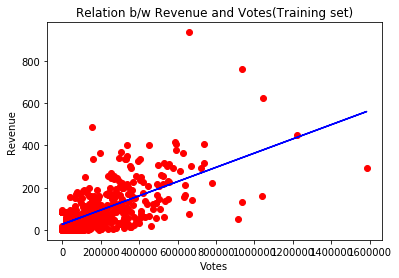

In [29]:
# Visualising the Training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Relation b/w Revenue and Votes(Training set)')
plt.xlabel('Votes')
plt.ylabel('Revenue')
plt.show()

Text(0, 0.5, 'Actual value of Revenue')

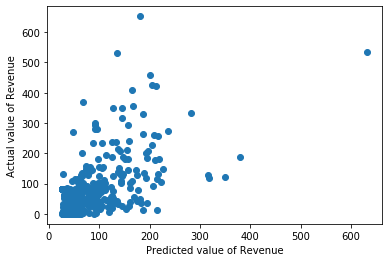

In [30]:
predictions=lm.predict(X_test)
plt.scatter(predictions,y_test)
plt.xlabel("Predicted value of Revenue")
plt.ylabel("Actual value of Revenue")

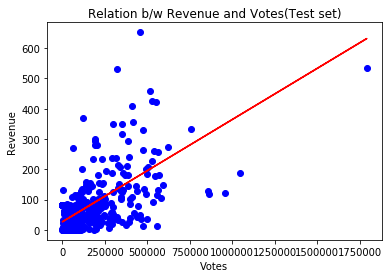

In [31]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test,predictions, color = 'red')
plt.title('Relation b/w Revenue and Votes(Test set)')
plt.xlabel('Votes')
plt.ylabel('Revenue')
plt.show()

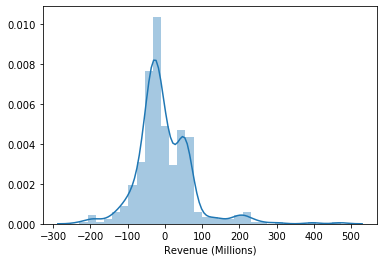

In [32]:
sb.distplot(y_test-predictions)
#Histogram of Residuals
#Normal Distribution

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(y_test,predictions)
#MAE

53.492743334545565

In [35]:
print('R-Square',metrics.explained_variance_score(y_test,predictions))

R-Square 0.29498489203654177


In [36]:
#Lets try to build a multiple linear regresion model with Revenue as target variable and Votes and Runtime as independent
#variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=imdb[['Votes','Runtime (Minutes)']]
y=imdb['Revenue (Millions)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=52)
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)

31.032553620879796


In [38]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])

In [39]:
cdf

,Coefficients
Votes,0.000287
Runtime (Minutes),0.016608


Text(0, 0.5, 'Actual value of Revenue')

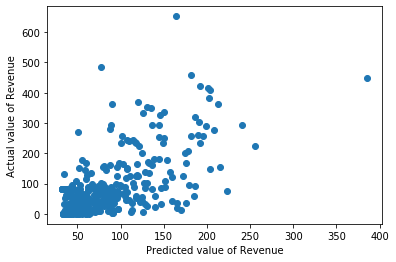

In [40]:
predictions=lm.predict(X_test)
plt.scatter(predictions,y_test)
plt.xlabel("Predicted value of Revenue")
plt.ylabel("Actual value of Revenue")

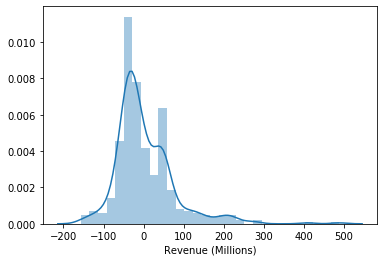

In [41]:
sb.distplot(y_test-predictions)
#Histogram of Residuals
#Normal Distribution

In [42]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)
#MAE

52.758629442463906

In [43]:
#R-Square
metrics.explained_variance_score(y_test,predictions)

0.3829742841374695

In [44]:
#We can see that the MAE of this model is less than the simple linear regression model 
#Hence, we accept this model

In [45]:
#Multiple linear Regression considering all numeric features of the dataset
X=imdb[['Votes','Runtime (Minutes)','Metascore']]
y=imdb['Revenue (Millions)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=56)
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(lm.intercept_)

46.22241187877492


In [47]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
cdf

,Coefficients
Votes,0.000313
Runtime (Minutes),0.100639
Metascore,-0.404273


Text(0, 0.5, 'Actual value of Revenue')

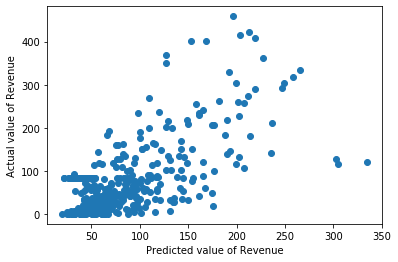

In [48]:
predictions=lm.predict(X_test)
plt.scatter(predictions,y_test)
plt.xlabel("Predicted value of Revenue")
plt.ylabel("Actual value of Revenue")

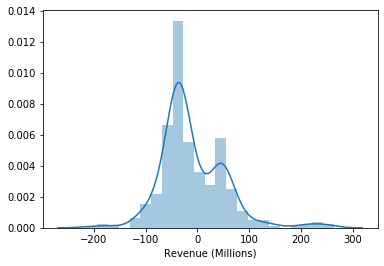

In [49]:
sb.distplot(y_test-predictions)
#Histogram of Residuals
#Normal Distribution

In [50]:
metrics.mean_absolute_error(y_test,predictions)
#MAE

50.05516154969411

In [51]:
#R-Square
metrics.explained_variance_score(y_test,predictions)

0.4400872099191342

In [52]:
#SIMPLE RECOMMENDER
mean_ratings=imdb['Rating'].mean()
mean_ratings


6.723200000000003

In [53]:
m=imdb['Votes'].quantile(0.75)
m

239909.75

In [54]:
q_movies=imdb.copy().loc[imdb['Votes']>=m]
q_movies.shape

(250, 12)

In [55]:
def demoratings(x,m=m,C=mean_ratings):
    v=x['Votes']
    R=x['Rating']
    return(v/(v+m)*R)+(m/(m+v)*C)

In [56]:
q_movies['newratings']=q_movies.apply(demoratings,axis=1)

In [57]:
q_movies=q_movies.sort_values('newratings',ascending=False)

In [58]:
q_movies[['Title','Votes','Rating','newratings']].head(10)
#TOP 10 MOVIES BASED ON SIMPLE RECOMMENDER

,Title,Votes,Rating,newratings
54,The Dark Knight,1791916,9.0,8.731165
80,Inception,1583625,8.8,8.526770
36,Interstellar,1047747,8.6,8.250324
124,The Dark Knight Rises,1222645,8.5,8.208543
99,The Departed,937414,8.5,8.137932
64,The Prestige,913152,8.5,8.130313
144,Django Unchained,1039115,8.4,8.085479
249,The Intouchables,557965,8.6,8.035673
634,WALL·E,776897,8.4,8.004369
77,Inglourious Basterds,959065,8.3,7.984489


In [59]:
#CONTENT BASED RECOMMENDATION USING DESCRIPTION ATTRIBUTE

In [60]:
imdb['Description'].head(10)

0    A group of intergalactic criminals are forced ...
1    Following clues to the origin of mankind, a te...
2    Three girls are kidnapped by a man with a diag...
3    In a city of humanoid animals, a hustling thea...
4    A secret government agency recruits some of th...
5    European mercenaries searching for black powde...
6    A jazz pianist falls for an aspiring actress i...
7    A has-been actor best known for playing the ti...
8    A true-life drama, centering on British explor...
9    A spacecraft traveling to a distant colony pla...
Name: Description, dtype: object

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf=TfidfVectorizer(stop_words='english')
imdb['Description']=imdb['Description'].fillna('')

In [63]:
desc_matrix=tfidf.fit_transform(imdb['Description'])
desc_matrix.shape

(1000, 5667)

In [64]:
print(desc_matrix)

  (0, 5314)	0.3215734366412338
  (0, 1148)	0.3023381228609386
  (0, 4937)	0.3023381228609386
  (0, 5493)	0.2971980892080351
  (0, 1888)	0.3891343606726167
  (0, 4777)	0.2551245011753801
  (0, 5613)	0.2623257870529036
  (0, 2020)	0.24877251686207938
  (0, 1229)	0.33971922781539177
  (0, 2649)	0.33971922781539177
  (0, 2246)	0.21774339622092687
  (1, 4069)	0.2841457702551132
  (1, 4660)	0.24611438520757062
  (1, 3327)	0.3247994693213087
  (1, 1503)	0.3247994693213087
  (1, 4812)	0.37204439281792756
  (1, 1968)	0.20405347429299328
  (1, 4971)	0.22022599122103517
  (1, 3120)	0.3153987761756993
  (1, 3568)	0.37204439281792756
  (1, 1005)	0.30745060337197083
  (1, 2012)	0.29449256448245537
  (2, 78)	0.31258698164490356
  (2, 3440)	0.14225655692788117
  (2, 2086)	0.31258698164490356
  :	:
  (997, 3503)	0.3647509231777795
  (997, 4677)	0.3184321779056564
  (997, 1284)	0.3184321779056564
  (997, 1458)	0.2946733668397855
  (997, 4821)	0.28339339973665945
  (997, 4292)	0.30142341499115827
  (997,

In [65]:
from sklearn.metrics.pairwise import linear_kernel

In [66]:
cos_sim=linear_kernel(desc_matrix,desc_matrix)

In [67]:
indices=pd.Series(imdb.index,index=imdb['Title']).drop_duplicates()

In [68]:
def description_recommendation(title,cos_sim=cos_sim):
    indx=indices[title]
    sim_scores=list(enumerate(cos_sim[indx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:16]
    film_index=[i[0] for i in sim_scores]
    return imdb['Title'].iloc[film_index]

In [69]:
description_recommendation('Kung Fu Panda')

827                        The Warriors Gate
343                            Pete's Dragon
772                 How to Train Your Dragon
0                    Guardians of the Galaxy
408    The Hunger Games: Mockingjay - Part 2
758                      Conan the Barbarian
903               How to Train Your Dragon 2
194                                  Warrior
271        The Hobbit: An Unexpected Journey
533                                     Lucy
969                          The Lone Ranger
802                                  Beowulf
621                     Underworld Awakening
871                     Dragonball Evolution
38                     The Magnificent Seven
Name: Title, dtype: object

In [70]:
description_recommendation("Pirates of the Caribbean: At World's End")

45      Pirates of the Caribbean: On Stranger Tides
78       Pirates of the Caribbean: Dead Man's Chest
309                                How to Be Single
114    Harry Potter and the Deathly Hallows: Part 2
195              Captain America: The First Avenger
108                                      All We Had
106                                    The Comedian
35                       Captain America: Civil War
278                          Everybody Wants Some!!
753                                  This Means War
503                                           Youth
124                           The Dark Knight Rises
46                                      Miss Sloane
803                       Jack Ryan: Shadow Recruit
736                        The Blackcoat's Daughter
Name: Title, dtype: object

In [71]:
#CONTENT BASED RECOMMENDATION USING GENRE,DIRECTOR AND TOP TWO ACTORS
genre=imdb.copy()
    

In [72]:
for index,row in genre['Genre'].iteritems():
    genre['Genre'].loc[index]=row.split(",")

C:\Users\SARTHAK\Anaconda3.3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
genre['Genre'].head(5)

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [74]:
for index,row in genre['Actors'].iteritems():
    #row=row.split(",")
    #row=row[0:2]
    genre['Actors'].loc[index]=row.split(',')[0:2]

In [75]:
genre['Actors'][5]

['Matt Damon', ' Tian Jing']

In [76]:
def cleanit(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    elif isinstance(x,str):
        return str.lower(x.replace(" ",""))

In [77]:
attributes=['Genre','Actors','Director']
for i in attributes:
    genre[i]=genre[i].apply(cleanit)

In [78]:
def createmix(x):
    return ' '.join(x['Genre'])+' '+' '.join(x['Actors'])+' '+x['Director']

In [79]:
genre['mix']=genre.apply(createmix,axis=1)

In [80]:
genre['mix'].head(5)

0    action adventure sci-fi chrispratt vindiesel j...
1    adventure mystery sci-fi noomirapace loganmars...
2    horror thriller jamesmcavoy anyataylor-joy m.n...
3    animation comedy family matthewmcconaughey ree...
4    action adventure fantasy willsmith jaredleto d...
Name: mix, dtype: object

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
counter=CountVectorizer(stop_words='english')
counter_matrix=counter.fit_transform(genre['mix'])

In [83]:
print(counter_matrix)

  (0, 9)	1
  (0, 22)	1
  (0, 1461)	1
  (0, 515)	1
  (0, 281)	1
  (0, 1646)	1
  (0, 690)	1
  (1, 22)	1
  (1, 1461)	1
  (1, 515)	1
  (1, 1191)	1
  (1, 1245)	1
  (1, 1004)	1
  (1, 586)	1
  (1, 1366)	1
  (2, 635)	1
  (2, 1589)	1
  (2, 696)	1
  (2, 130)	1
  (2, 859)	1
  (2, 1235)	1
  (3, 102)	1
  (3, 320)	1
  (3, 508)	1
  (3, 1088)	1
  :	:
  (995, 332)	1
  (995, 271)	1
  (995, 188)	1
  (996, 635)	1
  (996, 453)	1
  (996, 972)	1
  (996, 616)	1
  (997, 428)	1
  (997, 1188)	1
  (997, 1397)	1
  (997, 832)	1
  (997, 304)	1
  (997, 1377)	1
  (997, 215)	1
  (998, 22)	1
  (998, 320)	1
  (998, 14)	1
  (998, 1170)	1
  (998, 1463)	1
  (999, 320)	1
  (999, 508)	1
  (999, 509)	1
  (999, 748)	1
  (999, 159)	1
  (999, 934)	1


In [84]:
counter_matrix.shape

(1000, 1705)

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
cos_sim_gen=cosine_similarity(counter_matrix,counter_matrix)

In [87]:
indexes=pd.Series(genre.index,index=genre['Title'])

In [88]:
def genre_actor_recommendation(title,cos_sim=cos_sim_gen):
    indx=indexes[title]
    sim_scores=list(enumerate(cos_sim[indx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:16]
    film_index=[i[0] for i in sim_scores]
    return genre['Title'].iloc[film_index]

In [89]:
genre_actor_recommendation('Kung Fu Panda')

603               Kung Fu Panda 3
384                The Lego Movie
400                       Minions
448                    Big Hero 6
484                   Angry Birds
772      How to Train Your Dragon
802                       Beowulf
903    How to Train Your Dragon 2
284                      Hercules
344                  Spider-Man 3
368        The Amazing Spider-Man
4                   Suicide Squad
5                  The Great Wall
8              The Lost City of Z
15        The Secret Life of Pets
Name: Title, dtype: object

In [90]:
genre_actor_recommendation("Pirates of the Caribbean: At World's End")

78      Pirates of the Caribbean: Dead Man's Chest
45     Pirates of the Caribbean: On Stranger Tides
969                                The Lone Ranger
4                                    Suicide Squad
5                                   The Great Wall
37                                  Doctor Strange
50      Star Wars: Episode VII - The Force Awakens
51                          Underworld: Blood Wars
87                                          Avatar
91                                        Warcraft
101                                           Thor
214                           Thor: The Dark World
294                                   Man of Steel
306                Alice Through the Looking Glass
325                          The Last Witch Hunter
Name: Title, dtype: object